#Covid19 Face Mask Classifier


*   Classifies images of people based on whether or not they are wearing a face mask.





### Mounting Google Drive/Importing Data



In [2]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/tmp'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###Imports tensorflow

In [0]:
import tensorflow as tf

### Creating the Model
Add the densely connected layers for *binary classification*

*   Uses Santa/Not Santa Classification Model


In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)
		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
	 # first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
	# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
	# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		# return the constructed network architecture
		return model
		

[INFO] loading images...
[INFO] compiling model...
[INFO] training network...
Epoch 1/150
58/58 [==============================] - 1s 18ms/step - loss: 0.6382 - accuracy: 0.6260 - val_loss: 0.4827 - val_accuracy: 0.7881
Epoch 2/150
58/58 [==============================] - 1s 17ms/step - loss: 0.4503 - accuracy: 0.7955 - val_loss: 0.4223 - val_accuracy: 0.8090
Epoch 3/150
58/58 [==============================] - 1s 16ms/step - loss: 0.3973 - accuracy: 0.8326 - val_loss: 0.3427 - val_accuracy: 0.8523
Epoch 4/150
58/58 [==============================] - 1s 16ms/step - loss: 0.3351 - accuracy: 0.8648 - val_loss: 0.3910 - val_accuracy: 0.8411
Epoch 5/150
58/58 [==============================] - 1s 16ms/step - loss: 0.3290 - accuracy: 0.8691 - val_loss: 0.3019 - val_accuracy: 0.8764
Epoch 6/150
58/58 [==============================] - 1s 17ms/step - loss: 0.3234 - accuracy: 0.8686 - val_loss: 0.2859 - val_accuracy: 0.8812
Epoch 7/150
58/58 [==============================] - 1s 17ms/step - lo

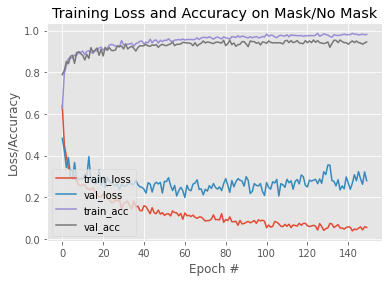

In [75]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
#from pyimagesearch.lenet import LeNet
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 150 #optimal number of epochs for classification
INIT_LR = 1e-3
BS = 32 #CHANGE
# Dictionary containting path to dataset in mounted google drive
args = {
 "dataset": base_dir ,
 "model": "model.h5",
 "plot" :"plot.png"
}
print("[INFO] loading images...")
data = []
labels = []
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(args["dataset"])))
random.seed(42)
random.shuffle(imagePaths)
# loop over the input images
for imagePath in imagePaths:
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (28,28))
	image = img_to_array(image)
	data.append(image)
	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	label = 1 if label == "no-mask" else 0
	labels.append(label)
 # scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the network
print("[INFO] training network...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)
# save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Mask/No Mask")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

###Displays Saved Image

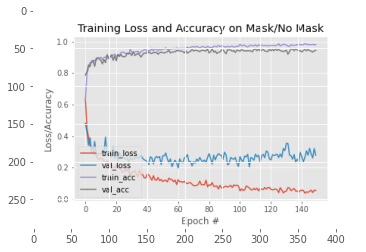

In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
img= mpimg.imread('/content/plot.png')
imgplot = plt.imshow(img)
plt.show()


Saving non-masked.png to non-masked (5).png
[[0. 1.]]
non-masked.png is not wearing a mask


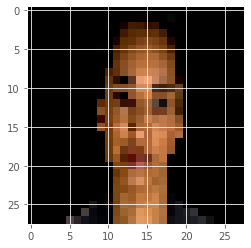

In [79]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  imgplot = plt.imshow(img)
  plt.show() 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)
  print(classes)
  if classes.item(0)>0.5:  
    print(fn + " is wearing a mask")
  else:
    print(fn + " is not wearing a mask")